# LSN Esercizi lezione 5
Gloria Senatore 931644

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Esercizio 5.1

#### Svolgimento

L'esercizio richiede di campionare le densità di probabilità relative alle funzioni d'onda dell'elettrone nell'atomo di idrogeno nei livelli $n=1$, $l=0$, $m_{l}=0$ e $n=2$, $l=1$, $m_{l}=0$ con l'algoritmo di Metropolis. Si richiede quindi di stimare i valori di $<r>_{\psi_{1,0,0}}$ e $<r>_{\psi_{2,1,0}}$.

L'algoritmo utilizzato è il seguente: si sceglie una posizione iniziale ragionevole, si genera un altro punto con probabilità di transizione $T(\vec{x}|\vec{y})$ uniforme (ricordando che questo significa estrarre uniformemente $\phi$ tra $0$ e $2\pi$, $f$ tra $0$ e $1$, $r$ tra $0$ e $\eta$, porre $\theta = \arccos{(1-2f)}$ e incrementare il punto precedente di $r\sin{\theta}\cos{\phi}$ per la componente $x$, $r\sin{\theta}\sin{\phi}$ per la componente $y$ e $r\cos{\theta}$ per la componente $z$). Dati $\vec{y}$ il punto iniziale e $\vec{x}$ il nuovo punto proposto, si calcola l'accettanza come $min\left[1, \frac{T(\vec{y}|\vec{x})p(\vec{x})}{T(\vec{x}|\vec{y})p(\vec{y})}\right]$ e, poiché la probabilità di transizione scelta è simmetrica, l'accettanza diventa $min\left[1, \frac{p(\vec{x})}{p(\vec{y})}\right]$, ossia il minimo tra $1$ e il rapporto tra la probabilità $p(\vec{x}) = |\psi(\vec{x})|^2$ del nuovo punto e la probabilità $p(\vec{y}) = |\psi(\vec{y})|^2$ del punto di partenza. Si estrae in seguito un numero uniforme tra $0$ e $1$: se il numero è minore o uguale all'accettanza, il nuovo punto proposto diventa il punto di partenza per la successiva iterazione, altrimenti il nuovo punto di partenza rimane il punto di partenza dell'iterazione appena conclusa. Si calcola il valore medio con incertezza delle posizioni.

Viene scelta la $T(\vec{x}|\vec{y})$ in modo che l'accettanza sia circa del $50\%$. Con un'accettanza troppo bassa, infatti, ovvero con passi troppo lunghi, l'efficienza dell'algoritmo sarebbe troppo piccola e con un'accettanza troppo alta, ossia passi brevi, si avrebbe un'eccessiva correlazione. Ciò si ottiene per $\eta =$ $2.5 a_{0}$ per $\psi_{1,0,0}$ e $\eta = 5.8 a_{0}$ per $\psi_{2,1,0}$.

Si ripete lo stesso procedimento con una $T(\vec{x}|\vec{y})$ gaussiana, che è sempre una probabilità di transizione simmetrica. In questo caso gli angoli $\theta$ e $\phi$ sono ancora distribuiti uniformemente, poichè lo spazio è isotropo, mentre $r$ è estratta da distribuzioni normali centrate in $0$ e di deviazione standard $1.8 a_{0}$ per $\psi_{1,0,0}$ e $4.6 a_{0}$ per $\psi_{2,1,0}$.

Poiché l'algoritmo di Metropolis genera sempre correlazione, è importante stimare le incertezze sui valori medi delle posizioni con approcci quali il *data blocking*. Risulta importante scegliere un numero di step Montecarlo in ogni blocco molto maggiore della lunghezza di correlazione tra step.

#### Risultati

Di seguito i risultati ottenuti per $<r>_{\psi_{1,0,0}}$ e $<r>_{\psi_{2,1,0}}$ meno i valori attesi in funzione del numero di blocchi $N = 100$ con un numero di simulazioni totale $M = 10^6$, per $T(\vec{x}|\vec{y})$ uniforme e gaussiana. Si equilibrano sempre i campionamenti per $200$ passi prima di effettuare le misure di $<r>$.

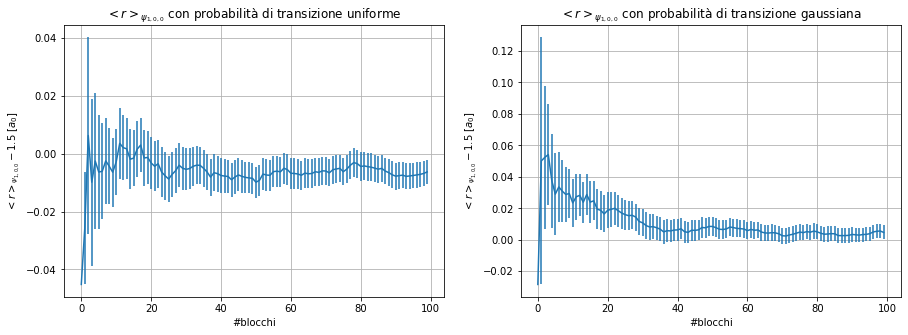

In [8]:
M=1000000              
N=100                 
L=int(M/N)
x = np.arange(N)

unif_r100 = np.loadtxt("unif_r100")
err_unif_r100 = np.loadtxt("unif_r100_err")
gauss_r100 = np.loadtxt("gauss_r100")
err_gauss_r100 = np.loadtxt("gauss_r100_err")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax=ax1
ax.errorbar(x,unif_r100 - 1.5,yerr=err_unif_r100)
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$<r>_{\psi_{1,0,0}} - 1.5 ~[a_{0}]$')
ax.set_title("$<r>_{\psi_{1,0,0}}$ con probabilità di transizione uniforme")
ax.grid(True)

ax=ax2
ax.errorbar(x,gauss_r100 - 1.5,yerr=err_gauss_r100)
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$<r>_{\psi_{1,0,0}} - 1.5 ~[a_{0}]$')
ax.set_title("$<r>_{\psi_{1,0,0}}$ con probabilità di transizione gaussiana")
ax.grid(True)

Per valutare quanto richiesto, è stata scelta come posizione iniziale $(\frac{3}{2}a_{0}, 0, 0)$. Si osserva che si ottiene una buona convergenza al valore teorico, con un'incertezza che si riduce all'aumentare del numero di blocchi.

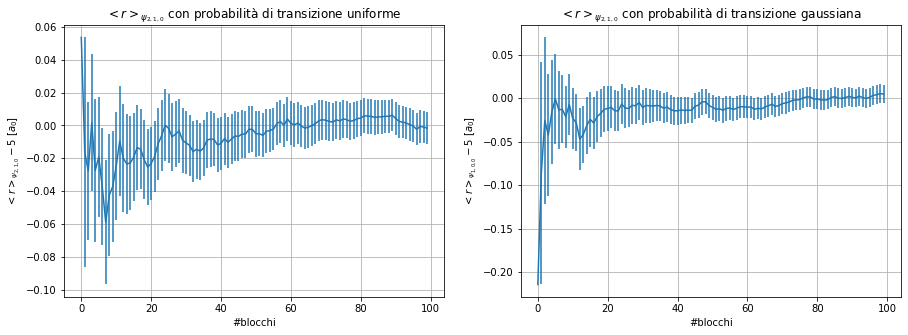

In [9]:
unif_r210 = np.loadtxt("unif_r210")
err_unif_r210 = np.loadtxt("unif_r210_err")
gauss_r210 = np.loadtxt("gauss_r210")
err_gauss_r210 = np.loadtxt("gauss_r210_err")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax=ax1
ax.errorbar(x,unif_r210 - 5,yerr=err_unif_r210)
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$<r>_{\psi_{2,1,0}} - 5 ~[a_{0}]$')
ax.set_title("$<r>_{\psi_{2,1,0}}$ con probabilità di transizione uniforme")
ax.grid(True)

ax=ax2
ax.errorbar(x,gauss_r210 - 5,yerr=err_gauss_r210)
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$<r>_{\psi_{1,0,0}} - 5 ~[a_{0}]$')
ax.set_title("$<r>_{\psi_{2,1,0}}$ con probabilità di transizione gaussiana")
ax.grid(True)

In questo caso si è pensato di scegliere come posizione iniziale $(0, 0, 5a_{0})$ poiché, essendo $m_{l} = 0$, ci si aspetta che il momento angolare sia perpendicolare all'asse $z$ e quindi che l'elettrone si trovi con molta probabilità proprio lungo questo asse. Si nota una buona convergenza al valore atteso.

In conclusione, le stime di $<r>$ medio con $T$ uniforme e gaussiana sono equivalenti entro gli errori sperimentali.

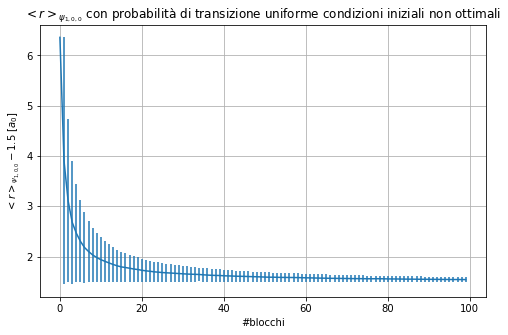

In [5]:
unif_r100 = np.loadtxt("unif_r100_lontano")
err_unif_r100 = np.loadtxt("unif_r100_err_lontano")

plt.figure(figsize=(8,5))
plt.errorbar(x,unif_r100,yerr=err_unif_r100)
plt.xlabel('#blocchi')
plt.ylabel(r'$<r>_{\psi_{1,0,0}} - 1.5 ~[a_{0}]$')
plt.title("$<r>_{\psi_{1,0,0}}$ con probabilità di transizione uniforme condizioni iniziali non ottimali")
plt.grid(True)
plt.show()

Il grafico mostra come, partendo da una posizione iniziale lontana dal valore medio, quale $(150a_{0}, 0, 0)$, l'algoritmo di Metropolis fallisca per le prime iterazioni nello stimare la corretta posizione media dell'elettrone. Questo perché la convergenza dell'algoritmo è solo asintotica. Piuttosto rapidamente ci si avvicina alla posizione media attesa.

Si riportano di seguito i plot 3D rappresentativi dei punti campionati. Tutte le distanze sono in unità di $a_{0}$.

In [4]:
punti = np.loadtxt("unif_punti_100")

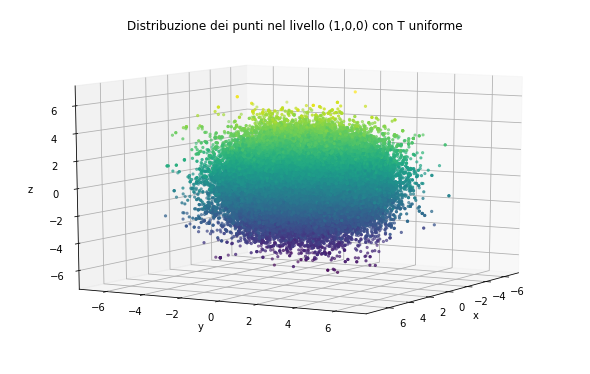

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = []
Y = []
Z = []
for i in range(0, punti.size):
    if(i%3 == 0): X.append(punti[i])
    if(i%3 == 1): Y.append(punti[i])
    if(i%3 == 2): Z.append(punti[i])

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Distribuzione dei punti nel livello (1,0,0) con T uniforme")
ax.view_init(10, 30)
plt.show()

Siccome $l = 0$ e $m_l = 0$, ci si attende e si ottiene una distribuzione indipendente da $\theta$ e $\phi$.

In [10]:
punti_gauss = np.loadtxt("gauss_punti_100")

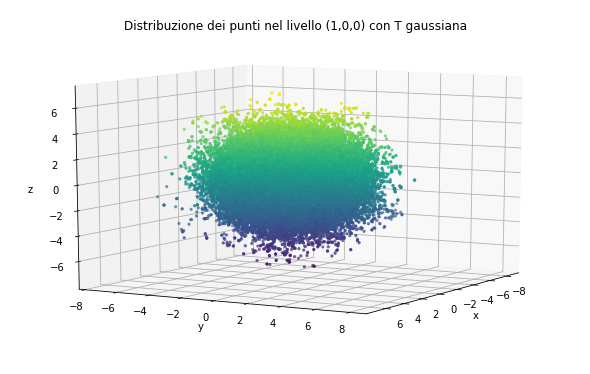

In [11]:
X = []
Y = []
Z = []
for i in range(0, punti.size):
    if(i%3 == 0): X.append(punti_gauss[i])
    if(i%3 == 1): Y.append(punti_gauss[i])
    if(i%3 == 2): Z.append(punti_gauss[i])

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Distribuzione dei punti nel livello (1,0,0) con T gaussiana")
ax.view_init(10, 30)
plt.show()

In [6]:
punti2 = np.loadtxt("unif_punti_210")

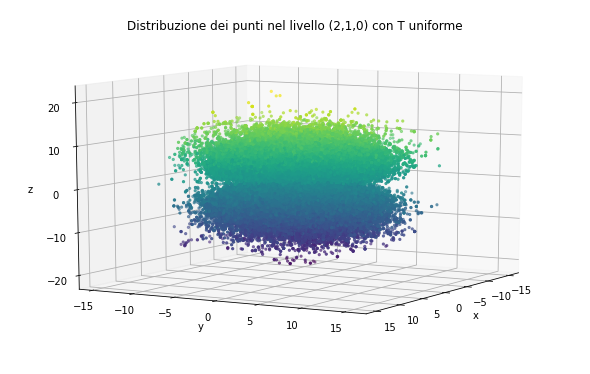

In [7]:
X = []
Y = []
Z = []
for i in range(0, punti2.size):
    if(i%3 == 0): X.append(punti2[i])
    if(i%3 == 1): Y.append(punti2[i])
    if(i%3 == 2): Z.append(punti2[i])

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Distribuzione dei punti nel livello (2,1,0) con T uniforme")
ax.view_init(10, 30)
plt.show()

Si osserva una distribuzione dei punti indipendente da $\phi$ e con un piano nodale perpendicolare a $z$.

In [12]:
punti2_gauss = np.loadtxt("gauss_punti_210")

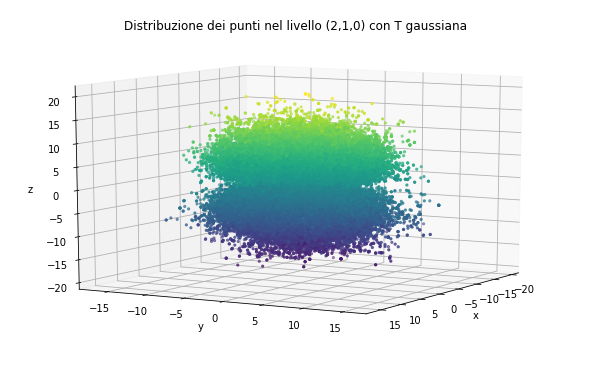

In [13]:
X = []
Y = []
Z = []
for i in range(0, punti2.size):
    if(i%3 == 0): X.append(punti2_gauss[i])
    if(i%3 == 1): Y.append(punti2_gauss[i])
    if(i%3 == 2): Z.append(punti2_gauss[i])

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Distribuzione dei punti nel livello (2,1,0) con T gaussiana")
ax.view_init(10, 30)
plt.show()

In [15]:
punti_lontano = np.loadtxt("unif_punti_100_lontano")

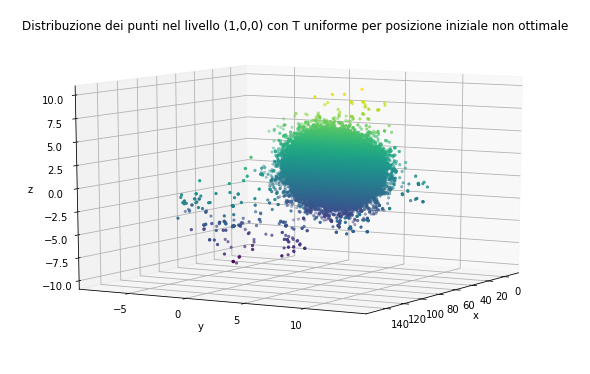

In [16]:
X = []
Y = []
Z = []
for i in range(0, punti2.size):
    if(i%3 == 0): X.append(punti_lontano[i])
    if(i%3 == 1): Y.append(punti_lontano[i])
    if(i%3 == 2): Z.append(punti_lontano[i])

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Distribuzione dei punti nel livello (1,0,0) con T uniforme per posizione iniziale non ottimale")
ax.view_init(10, 30)
plt.show()

Si osserva che, partendo da $(150a_{0},0,0)$, i primi punti sono lontani dalla posizione media attesa. 